In [1]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
dataSet = pd.read_csv("filtered_data_BAL.csv", usecols = range(1,155)).T
dataSet = dataSet.drop(dataSet.index[[101, 102]]) 
dataSet["Labels"] = 0
# rows: gene names, using 152 rows
# cols: samples, 2307 cols

In [3]:
dataI = dataSet.index.values
for i in range(len(dataSet)):
    if dataI[i].find("NC") != -1:
        dataSet["Labels"][i] = 0
    elif dataI[i].find("_SA_") != -1:
        dataSet["Labels"][i] = 1
    elif dataI[i].find("_notSA_") != -1:
        dataSet["Labels"][i] = 2

X = dataSet.iloc[:,:-1]     # 152 rows x 2306 cols  
y = dataSet.iloc[:,-1:]     # 152 rows x 1 col

/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_53765/1183761148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet["Labels"][i] = 0
/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_53765/1183761148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet["Labels"][i] = 2
/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_53765/1183761148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataS

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, test_size = 0.20, random_state = 125, shuffle = True)


In [6]:
guassianModel = GaussianNB()
guassianModel.fit(XTrain, yTrain)
yPred = guassianModel.predict(XTest)   

/Users/sinhanushka_/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
accuray = accuracy_score(yPred, yTest)
f1 = f1_score(yPred, yTest, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)
print("Naive Bayes score: ",guassianModel.score(XTest, yTest))

Accuracy: 0.7096774193548387
F1 Score: 0.7218532574320051
Naive Bayes score:  0.7096774193548387


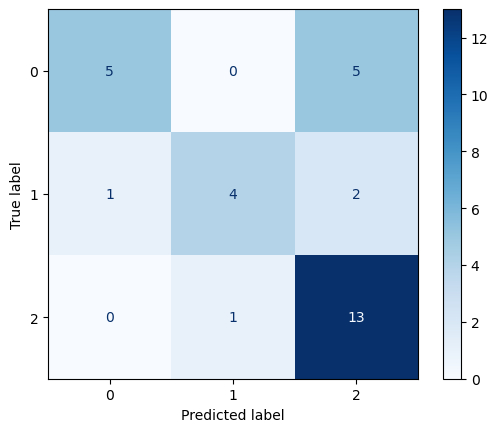

In [8]:
matrix = confusion_matrix(yTest, yPred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()